In [1]:
##Import packages
import skimage.data as skid
import cv2
import pylab as plt
from PIL import Image
from matplotlib import image
from matplotlib import pyplot as plt
%matplotlib inline 
import numpy as np

(289, 415, 3)


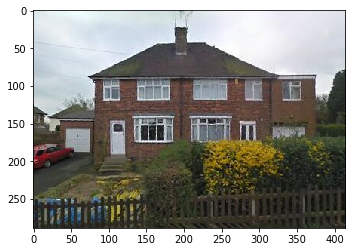

In [2]:
#import test image
img = image.imread('test1.jpg')
print (img.shape)
plt.imshow(img)
plt.show()

In [3]:
#convert the image into grayscale
gray= cv2.cvtColor(img ,cv2.COLOR_BGR2GRAY)

#define SIFT function
sift = cv2.xfeatures2d.SIFT_create()

#define intervals for Dense-grid SIFT
step_size = 5 #to compute a keypoint at each 5 pixle
kp = [cv2.KeyPoint(x, y, step_size) for y in range(0, gray.shape[0], step_size) 
                                    for x in range(0, gray.shape[1], step_size)]

In [4]:
#compute the descriptors for all these keypoints
kp,des = sift.compute(gray, kp)

In [5]:
#check the number of keypoints
len(kp)

4814

In [6]:
des.shape

(4814, 128)

In [7]:
import sklearn.preprocessing as sk
normalisation = sk.normalize(des, norm='l2', axis=1, copy=True, return_norm=True)
normalised = normalisation[0]
norm = normalisation[1]

([array([3.582e+03, 5.650e+02, 2.450e+02, 1.460e+02, 1.690e+02, 8.200e+01,
         2.400e+01, 1.000e+00, 0.000e+00, 0.000e+00]),
  array([3.568e+03, 7.320e+02, 2.340e+02, 1.190e+02, 1.000e+02, 5.300e+01,
         7.000e+00, 1.000e+00, 0.000e+00, 0.000e+00]),
  array([2886.,  778.,  414.,  255.,  214.,  162.,   70.,   16.,   15.,
            4.]),
  array([3.402e+03, 7.570e+02, 3.050e+02, 1.450e+02, 1.110e+02, 5.700e+01,
         1.800e+01, 9.000e+00, 7.000e+00, 3.000e+00]),
  array([3.365e+03, 6.510e+02, 2.810e+02, 1.950e+02, 1.900e+02, 7.100e+01,
         5.200e+01, 7.000e+00, 2.000e+00, 0.000e+00]),
  array([3917.,  598.,  181.,   71.,   38.,    9.,    0.,    0.,    0.,
            0.]),
  array([3.561e+03, 6.580e+02, 2.480e+02, 1.160e+02, 1.450e+02, 6.600e+01,
         1.800e+01, 2.000e+00, 0.000e+00, 0.000e+00]),
  array([3.914e+03, 6.310e+02, 1.790e+02, 4.900e+01, 3.300e+01, 5.000e+00,
         2.000e+00, 1.000e+00, 0.000e+00, 0.000e+00]),
  array([3342.,  631.,  292.,  149.,  23

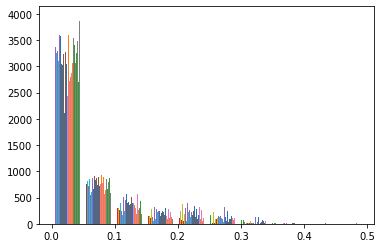

In [8]:
plt.hist(normalised)

In [9]:
norm

array([512.2685 , 511.92676, 512.728  , ..., 512.4334 , 511.73138,
       511.70596], dtype=float32)

(array([ 51., 211., 498., 804., 962., 955., 706., 455., 156.,  16.]),
 array([510.5115 , 510.8181 , 511.12473, 511.43134, 511.73795, 512.04456,
        512.3512 , 512.6578 , 512.9644 , 513.271  , 513.57764],
       dtype=float32),
 <a list of 10 Patch objects>)

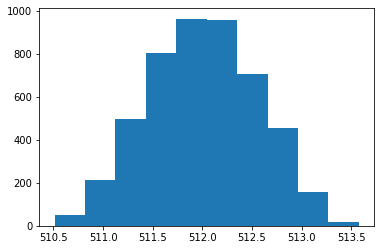

In [10]:
plt.hist(norm)

In [11]:
len(norm)

4814

In [12]:
sort = np.argsort(norm).tolist()
#top = []
#for o in range(len(norm)):
    #top += [sort.index(o)]

In [13]:
len(sort)

4814

In [14]:
normalised_selected = []
kp_selected = []
for i in sort[int(len(sort)*0.97): len(sort)]:
    kp_selected += [kp[i]]
    normalised_selected += [normalised[i]]

In [15]:
kp_selected[-1]

<KeyPoint 000001AFBD66DC00>

In [16]:
normalised_selected[0]

array([0.005848  , 0.02534132, 0.07407464, 0.        , 0.        ,
       0.00779733, 0.01949333, 0.00194933, 0.00194933, 0.00389867,
       0.00194933, 0.        , 0.        , 0.02534132, 0.03118932,
       0.00194933, 0.        , 0.        , 0.00194933, 0.        ,
       0.        , 0.011696  , 0.03118932, 0.00389867, 0.005848  ,
       0.        , 0.00194933, 0.03508799, 0.00779733, 0.00194933,
       0.00974666, 0.01949333, 0.3294372 , 0.1500986 , 0.22612257,
       0.00194933, 0.        , 0.00389867, 0.00974666, 0.06432798,
       0.07602397, 0.01364533, 0.00194933, 0.        , 0.        ,
       0.03118932, 0.06042931, 0.02534132, 0.        , 0.        ,
       0.        , 0.        , 0.00194933, 0.01559466, 0.10136529,
       0.011696  , 0.00194933, 0.        , 0.        , 0.2456159 ,
       0.2339199 , 0.01559466, 0.04678398, 0.00974666, 0.3294372 ,
       0.0838213 , 0.04288532, 0.        , 0.00194933, 0.00194933,
       0.00194933, 0.05847998, 0.10916262, 0.00194933, 0.     

In [17]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import math

distortions = []
K = range(1,20)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(normalised_selected)
    distortions.append(kmeanModel.inertia_)

In [18]:
def calc_distance (x1, y1, a, b, c):
    d = abs((a * x1 + b* y1 + c)) / (math.sqrt( a * a + b * b))
    return d

a = distortions [0] - distortions [18]
b = K[18] - K [0]
c1 = K[0] * distortions[18]
c2 = K[18] * distortions[0]
c = c1 - c2

distance_of_points_from_line = []
for k in range (18):
    distance_of_points_from_line.append(
        calc_distance(K[k], distortions[k], a, b, c))
    
optimal_k = distance_of_points_from_line.index(max(
                distance_of_points_from_line))+1

In [19]:
optimal_k

7

In [20]:
kmeans= KMeans(n_clusters=optimal_k, random_state=0).fit(normalised_selected)
centroids = kmeans.cluster_centers_

In [21]:
from sklearn.metrics import pairwise_distances_argmin_min
closests, _ = pairwise_distances_argmin_min(centroids, normalised_selected)

In [22]:
closests

array([ 80, 138, 143,  60,  86, 128,  57], dtype=int64)

In [23]:
closest1 = []
for closest_index in closests:
    data = kp_selected[closest_index]
    closest1 += [data]

In [24]:
closest1

[<KeyPoint 000001AFBD664360>,
 <KeyPoint 000001AFBD6576C0>,
 <KeyPoint 000001AFBD66CC30>,
 <KeyPoint 000001AFBD658390>,
 <KeyPoint 000001AFBD66DB40>,
 <KeyPoint 000001AFBD667360>,
 <KeyPoint 000001AFBD8EC120>]

In [25]:
test1 = kp_selected[-2:-1]

In [26]:
kp_selected

[<KeyPoint 000001AFBD661270>,
 <KeyPoint 000001AFBD662ED0>,
 <KeyPoint 000001AFBD66D180>,
 <KeyPoint 000001AFBD655F30>,
 <KeyPoint 000001AFBD651CC0>,
 <KeyPoint 000001AFBD6557B0>,
 <KeyPoint 000001AFBD66EDE0>,
 <KeyPoint 000001AFBD651810>,
 <KeyPoint 000001AFBD8F46F0>,
 <KeyPoint 000001AFBD64F900>,
 <KeyPoint 000001AFBD65BE40>,
 <KeyPoint 000001AFBD65B090>,
 <KeyPoint 000001AFBD8E2570>,
 <KeyPoint 000001AFBD65CED0>,
 <KeyPoint 000001AFBD665AB0>,
 <KeyPoint 000001AFBD8E0A80>,
 <KeyPoint 000001AFBD8F0AB0>,
 <KeyPoint 000001AFBD668BA0>,
 <KeyPoint 000001AFBD8E5780>,
 <KeyPoint 000001AFBD659630>,
 <KeyPoint 000001AFBD661150>,
 <KeyPoint 000001AFBD658540>,
 <KeyPoint 000001AFBD65D870>,
 <KeyPoint 000001AFBD659AB0>,
 <KeyPoint 000001AFBD657060>,
 <KeyPoint 000001AFBD666120>,
 <KeyPoint 000001AFBD65B960>,
 <KeyPoint 000001AFBD8E8300>,
 <KeyPoint 000001AFBD6683C0>,
 <KeyPoint 000001AFBD8E3240>,
 <KeyPoint 000001AFBD8E23C0>,
 <KeyPoint 000001AFBD662660>,
 <KeyPoint 000001AFBD66E570>,
 <KeyPoint

In [27]:
test1

[<KeyPoint 000001AFBD66CC30>]

## Based on these keypoints, patches were extracted containing the detected points and its surrounding information

In [28]:
from extract_patches.core import extract_patches
PATCH_SIZE = 70 #the size of each patch being extracted
mrSize = 6.0 
#size of the measurement region (as multiple of the feature scale) for orientation estimation
#6.0 was suggested for SIFT keypoints
patches = extract_patches(closest1, img, PATCH_SIZE, mrSize, 'cv2')

#show_idx = 300
#fig = plt.figure(figsize=(12, 20))
#for i in range(1,6):
    #fig.add_subplot(1, 5, i) 
    #plt.imshow(patches[show_idx+i])

In [29]:
len(patches)

7

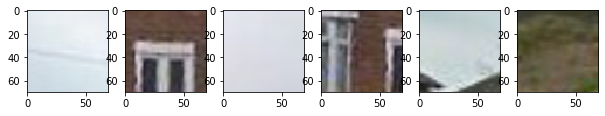

In [30]:
fig = plt.figure(figsize=(12, 20))
for i in range(1,7):
    fig.add_subplot(1, 7, i) 
    plt.imshow(patches[i])

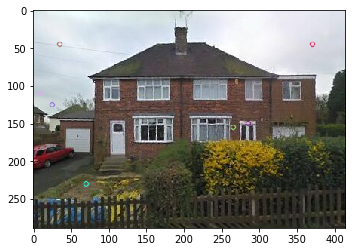

In [31]:
img_selected=cv2.drawKeypoints(img,closest1, img)
cv2.imwrite('test_dsift.jpg',img)
plt.figure()
plt.imshow(img_selected)
plt.show()